In [61]:
import pandas as pd

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
with zipfile.ZipFile('BitFinexData.zip', 'r') as dataset:
    dataset.extractall('BitFinex')

In [65]:
bitcoin = pd.read_csv('BitFinex/Bitfinex_BTCUSD_d.csv', skiprows=1)

<AxesSubplot:>

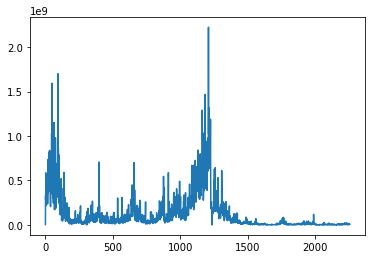

In [66]:
bitcoin['Volume USD'].plot()

<AxesSubplot:>

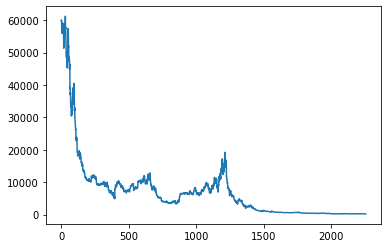

In [23]:
bitcoin.open.plot()

<AxesSubplot:>

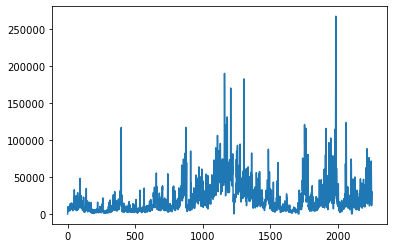

In [24]:
bitcoin["Volume BTC"].plot()

In [67]:
bitcoin['open_14_days'] = bitcoin['open'][::-1].rolling(window=14).mean()
bitcoin['close_max_7d'] = bitcoin['close'][::-1].rolling(window=7).max()

In [68]:
for day in range(1, 8):
    bitcoin[f'close_day_{day}'] = bitcoin['close'][::-1].shift(day+1)

In [69]:
bitcoin['dt'] = pd.to_datetime(bitcoin['date'])

In [70]:
bitcoin['weekday'] = bitcoin['dt'].dt.weekday
bitcoin['month'] = bitcoin['dt'].dt.month
bitcoin['year'] = bitcoin['dt'].dt.year

In [71]:
bitcoin['target'] = bitcoin['close'].shift(1)

In [72]:
bitcoin[['date', 'close', 'target']].head()

,date,close,target
0,2021-04-13 00:00:00,60240.0,NaN
1,2021-04-12 00:00:00,59874.0,60240.0
2,2021-04-11 00:00:00,60032.0,59874.0
3,2021-04-10 00:00:00,59812.0,60032.0
4,2021-04-09 00:00:00,58134.0,59812.0


In [73]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("unix", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin.drop("dt", axis=1, inplace=True)
# dropna - удалить строки
# fillna - заполнить строчки
bitcoin.dropna(inplace=True)
bitcoin.head()

,open,high,low,close,Volume USD,Volume BTC,open_14_days,close_max_7d,close_day_1,close_day_2,...,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
1,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195,58389.918730,60032.0,59812.0,58134.0,...,0,0,0,0,0,0,0,0,0,1
2,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998,58086.347301,60032.0,58134.0,58110.0,...,0,0,0,0,0,0,0,0,0,1
3,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479,57805.199174,59812.0,58110.0,55962.0,...,0,0,0,0,0,0,0,0,0,1
4,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697,57580.049842,59145.0,55962.0,57991.0,...,0,0,0,0,0,0,0,0,0,1
5,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596,57097.714896,59145.0,57991.0,59145.0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
y = bitcoin.target
X = bitcoin.drop("target", axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [78]:
X_train

,open,high,low,close,Volume USD,Volume BTC,open_14_days,close_max_7d,close_day_1,close_day_2,...,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
786,3676.45,3790.00,3655.00,3735.50,5.226156e+07,14084.30,3616.438571,3735.50,3670.10,3656.70,...,0,0,0,0,0,0,0,1,0,0
894,6368.39,6443.90,6352.90,6406.10,5.855919e+07,9184.77,6505.863571,6531.50,6330.10,6346.50,...,0,1,0,0,0,0,1,0,0,0
1993,303.59,321.53,301.50,315.03,1.555893e+07,49852.64,276.937857,315.03,295.59,286.63,...,1,0,0,1,0,0,0,0,0,0
753,4044.80,4070.60,4034.90,4045.20,1.958234e+07,4835.73,4018.993571,4127.16,4127.16,4104.58,...,0,0,0,0,0,0,0,1,0,0
608,10904.01,10909.00,9966.00,10064.56,1.511381e+08,14507.72,11230.269286,12050.00,11404.00,11565.36,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,644.50,644.50,637.58,639.94,3.133730e+06,4892.75,626.711429,644.12,639.60,641.35,...,1,0,0,0,1,0,0,0,0,0
1096,7912.00,8240.00,7739.10,7886.90,4.748910e+08,59368.40,6970.350000,7912.00,6943.10,6837.10,...,0,0,0,0,0,0,1,0,0,0
1131,9300.00,9428.00,8342.00,9216.20,8.420609e+08,95204.71,10488.700000,11499.00,9910.60,10720.00,...,0,0,0,0,0,0,1,0,0,0
1295,3930.10,3985.00,3838.00,3881.50,8.346526e+07,21296.75,3763.714286,3930.10,3654.70,3779.60,...,0,0,0,0,0,1,0,0,0,0


In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train, y_train) #  Обучение

LinearRegression()

In [82]:
y_pred = model.predict(X_test) #  Экзамен

In [83]:
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 7308.19109963841
MAE = 235.81689245700534
R2 = 0.9968263783522976
